In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
device = torch.device("cuda:0")

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
torch.cuda.memory_allocated()

0

In [2]:
torch.cuda.memory_cached()

0

In [3]:
%%time
df = pd.read_csv('merged.csv').drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1'], axis=1)

Wall time: 23.5 s


In [4]:
df.head()

,SC_CODE,SC_NAME,SC_GROUP,SC_TYPE,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,NO_TRADES,NO_OF_SHRS,NET_TURNOV,TDCLOINDI,date
0,526921,21ST CEN.MGM,B,Q,109.7,113.50,106.00,108.35,108.00,108.10,454,89879,9802583.0,NaN,01/01/08
1,532628,3I INFOTECH,B1,Q,148.0,149.85,147.00,148.80,148.80,145.75,2531,328901,48747812.0,NaN,01/01/08
2,523395,3M INDIA LTD,B1,Q,2325.0,2325.00,2280.00,2291.60,2285.00,2300.35,61,504,1162223.0,NaN,01/01/08
3,990001,6.75% US-64,F,B,97.2,97.50,97.11,97.11,97.11,97.28,19,8110,788476.0,NaN,01/01/08
4,530499,A.K.CAPITAL,B,Q,370.0,419.95,365.00,412.35,413.00,401.25,57,39681,14677692.0,NaN,01/01/08


In [5]:
%%time

def pp(text):
    text = str(text)
    try:
        text_split = text.split('/')
        text = np.datetime64(f"20{text_split[2]}-{text_split[1]}-{text_split[0]}")
    except:
        text_split = text.split('-')
        print(text_split)
        text = np.datetime64(f"{text_split[2]}-{text_split[1]}-{text_split[0]}")
    return text

Wall time: 0 ns


In [6]:
def pp_name_group(text):
    return str(text).lstrip().rstrip().upper()

In [7]:
%%time
df['DATE'] = df['date'].apply(lambda x: pp(x))
df.index = df['DATE']
df['SC_NAME'] = df['SC_NAME'].apply(lambda x: pp_name_group(x))
df['SC_GROUP'] = df['SC_GROUP'].apply(lambda x: pp_name_group(x))
df.sort_index(inplace=True)

['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', 

['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', 

['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', '2020']
['09', '03', 

['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', 

['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', '2020']
['11', '03', 

In [8]:
%%time
y = df[((df['SC_GROUP'] == 'Z') & (df['DATE'] >= np.datetime64('2019-01-01')) & (df['DATE'] <= np.datetime64('2020-01-01')))]
y = y[y['SC_NAME'] == y['SC_NAME'].unique()[0]][['CLOSE']].values.astype(float)

Wall time: 829 ms


In [9]:
%%time

scaler = MinMaxScaler(feature_range=(-1,1))
y_norm = scaler.fit_transform(y)
y_norm = torch.FloatTensor(y_norm).view(-1).cuda()

window_size = 10

def input_data(seq, ws):
    out = []
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window, label))
    
    return out

train_data = input_data(y_norm, window_size)

class LSTMnetwork(nn.Module):
    def __init__(self, input_size=1, hidden_size=100, output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        self.lstm = nn.LSTM(input_size, hidden_size)
        
        self.linear = nn.Linear(hidden_size, output_size)
        
        self.hidden = (
            torch.zeros(1, 1, hidden_size).cuda(),
            torch.zeros(1, 1, hidden_size).cuda()
        )
        
    def forward(self, seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq), 1, -1), self.hidden
        )
        pred = self.linear(lstm_out.view(len(seq), -1))
        
        return pred[-1]

torch.manual_seed(101)
model = LSTMnetwork().cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Wall time: 7 s


In [10]:
torch.cuda.get_device_properties(device)

_CudaDeviceProperties(name='GeForce GTX 1660 Ti', major=7, minor=5, total_memory=6144MB, multi_processor_count=24)

In [11]:
next(model.parameters()).is_cuda

True

In [12]:
%%time
epochs = 10000
losses = []
for i in range(epochs):
    
    for seq, y_train in train_data:
        seq = seq.cuda()
        y_train = y_train.cuda()
        
        optimizer.zero_grad()
        
        model.hidden = (torch.zeros(1, 1, model.hidden_size).cuda(),
                       torch.zeros(1, 1, model.hidden_size).cuda())
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    losses.append(loss.item())
    if (i+1) % 500 == 0:
        print(f'Epoch {i+1} Loss {loss.item()}')

Epoch 500 Loss 0.07717752456665039
Epoch 1000 Loss 0.022284362465143204
Epoch 1500 Loss 0.002324229571968317
Epoch 2000 Loss 0.00010445309453643858
Epoch 2500 Loss 1.8326138615520904e-06
Epoch 3000 Loss 0.00011496600200189278
Epoch 3500 Loss 0.0018106164643540978
Epoch 4000 Loss 0.00021386833395808935
Epoch 4500 Loss 3.4932789276354015e-05
Epoch 5000 Loss 0.0009546001674607396
Epoch 5500 Loss 0.012940468266606331
Epoch 6000 Loss 0.006717123091220856
Epoch 6500 Loss 0.0008117042598314583
Epoch 7000 Loss 5.069289181847125e-05
Epoch 7500 Loss 0.0004357920552138239
Epoch 8000 Loss 1.1526976777531672e-05
Epoch 8500 Loss 0.00023787812096998096
Epoch 9000 Loss 6.214094173628837e-05
Epoch 9500 Loss 0.00018447372713126242
Epoch 10000 Loss 0.001782814972102642
Wall time: 19min 38s


In [ ]:
%%time
window_size = 12
future = 30

preds = torch.Tensor().cuda()

model.eval()

for i in range(future):
    
    seq = torch.FloatTensor(preds[-window_size:]).cuda()
    
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_size).cuda(),
                       torch.zeros(1, 1, model.hidden_size).cuda())
        
        preds.append(model(seq).item())

In [17]:
true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))

In [18]:
true_predictions

array([[  1.79861109],
       [  2.11375519],
       [  1.95002198],
       [  1.94347231],
       [  1.71899043],
       [ -0.56851132],
       [  0.33437468],
       [  0.52273386],
       [  0.89096253],
       [ -2.47608699],
       [ -1.32322006],
       [ -0.40038008],
       [ -0.25843174],
       [ -7.74384159],
       [ -0.70081902],
       [-16.56583265],
       [ -2.97442757],
       [ -9.86221794],
       [ -7.52417873],
       [ -1.82218148],
       [-12.8590002 ],
       [ -6.68413157],
       [ -8.79256104],
       [ -8.72362966],
       [-15.16329397],
       [-10.97733835],
       [-10.79147347],
       [-10.22389754],
       [-10.75756768],
       [-10.66105432]])

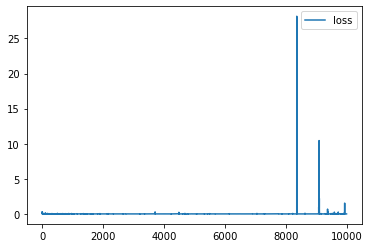

In [19]:
plt.plot(range(len(losses)), losses, label='loss')
plt.legend()

In [ ]:
x = np.arange('2020-01-01', '2020-02-01', dtype='datetime64[M]').astype('datetime64[M]')

plt.figure(figsize=(16,4))
plt.title('Future')
plt.xlabel('DATE')
plt.ylabel('CLOSE')
plt.grid(True)
plt.autoscale(axis='x', tight=True)

plt.plot(range(len(true_predictions)), true_predictions)
plt.show()